In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

In [2]:
plt.style.use('dark_background')

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

## Generate Data

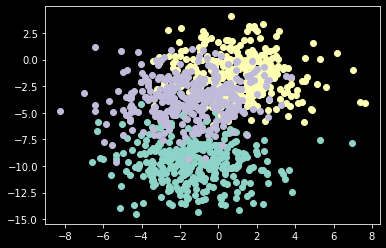

In [3]:
# generate 2d classification datasets
Xx, yy = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
    
    # select indices of points with the class label
    row_ix = np.where(yy == class_value)
    # scatter plot for points with a different color
    plt.scatter(Xx[row_ix, 0], Xx[row_ix, 1])
    
# show plot
plt.show()

In [4]:
display(len(Xx))
display(Xx)

1000

array([[  0.48719811,  -0.43160548],
       [ -1.48958879,  -3.47915742],
       [ -2.06250444,  -7.73300419],
       ...,
       [ -4.4839941 ,  -3.17623663],
       [ -1.92705839,   2.94801349],
       [ -2.32988529, -10.66109273]])

In [5]:
display(len(yy))
display(yy)

1000

array([2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 0,
       0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1,

In [6]:
# one hot encode output variable
y = tf.keras.utils.to_categorical(yy)

X = Xx

# split into train and test
n_train = 500

trainX, validX = X[:n_train, :], X[n_train:, :]
trainy, validy = y[:n_train], y[n_train:]

In [7]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

## 1) Batch Gradient Descent (batch_size=train_size)

In [8]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))#, kernel_initializer='he_uniform')) #1st hiddden layer
#model.add(Dense(20, input_dim=2, activation='relu')) #1st hiddden layer
model.add(Dense(3, activation='softmax'))

In [9]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD"), 
    metrics=['accuracy'])

In [10]:
# train model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=len(trainX), verbose=1)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 1.2404 - accuracy: 0.4000 - val_loss: 1.1529 - val_accuracy: 0.4100
Epoch 2/200
1/1 [==============================] - 0s 72ms/step - loss: 1.1512 - accuracy: 0.4140 - val_loss: 1.0471 - val_accuracy: 0.4920
Epoch 3/200
1/1 [==============================] - 0s 63ms/step - loss: 1.0448 - accuracy: 0.4900 - val_loss: 0.9853 - val_accuracy: 0.5420
Epoch 4/200
1/1 [==============================] - 0s 60ms/step - loss: 0.9874 - accuracy: 0.5160 - val_loss: 0.9726 - val_accuracy: 0.5240
Epoch 5/200
1/1 [==============================] - 0s 86ms/step - loss: 0.9815 - accuracy: 0.5120 - val_loss: 0.9765 - val_accuracy: 0.5180
Epoch 6/200
1/1 [==============================] - 0s 101ms/step - loss: 0.9914 - accuracy: 0.4980 - val_loss: 0.9706 - val_accuracy: 0.5180
Epoch 7/200
1/1 [==============================] - 0s 45ms/step - loss: 0.9891 - accuracy: 0.4940 - val_loss: 0.9458 - val_accuracy: 0.5120
Epoch 8/200
1/1 [====

In [11]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.820, Valid: 0.832


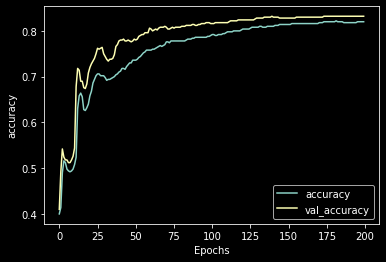

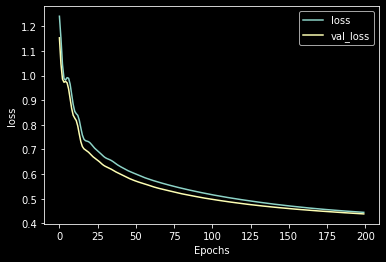

In [12]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 2) Stochastic Gradient Descent (batch_size=1)

In [13]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))#, kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax')) #Output layer

In [14]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD"), 
    metrics=['accuracy'])

In [15]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=1, verbose=1)

Epoch 1/200
500/500 [==============================] - 3s 5ms/step - loss: 0.9168 - accuracy: 0.5780 - val_loss: 0.8118 - val_accuracy: 0.6880
Epoch 2/200
500/500 [==============================] - 3s 5ms/step - loss: 0.9265 - accuracy: 0.5780 - val_loss: 0.6179 - val_accuracy: 0.7500
Epoch 3/200
500/500 [==============================] - 2s 4ms/step - loss: 0.8465 - accuracy: 0.6200 - val_loss: 0.9800 - val_accuracy: 0.5420
Epoch 4/200
500/500 [==============================] - 2s 5ms/step - loss: 0.9074 - accuracy: 0.5580 - val_loss: 0.7887 - val_accuracy: 0.6360
Epoch 5/200
500/500 [==============================] - 2s 4ms/step - loss: 0.9521 - accuracy: 0.5280 - val_loss: 0.8141 - val_accuracy: 0.6640
Epoch 6/200
500/500 [==============================] - 3s 5ms/step - loss: 0.9633 - accuracy: 0.5400 - val_loss: 0.7566 - val_accuracy: 0.6960
Epoch 7/200
500/500 [==============================] - 3s 5ms/step - loss: 0.9700 - accuracy: 0.5420 - val_loss: 0.9798 - val_accuracy: 0.5460

In [16]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.518, Valid: 0.552


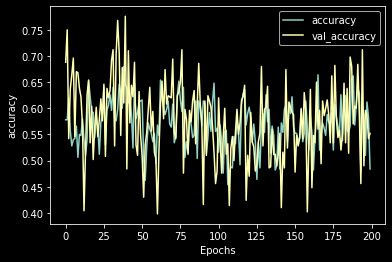

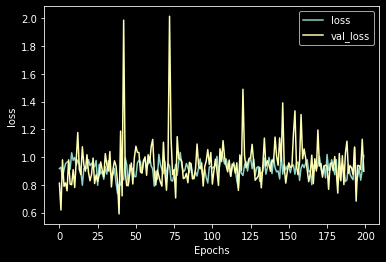

In [17]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 3) Stochastic Gradient Descent (batch_size=1, lr=0.001)

In [18]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))#, kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [19]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.001, momentum=0.9, nesterov=False, name="SGD"), 
    metrics=['accuracy'])

In [20]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=1, verbose=1)

Epoch 1/200
500/500 [==============================] - 3s 5ms/step - loss: 0.7330 - accuracy: 0.6320 - val_loss: 0.5522 - val_accuracy: 0.8000
Epoch 2/200
500/500 [==============================] - 3s 5ms/step - loss: 0.5704 - accuracy: 0.7600 - val_loss: 0.5061 - val_accuracy: 0.8120
Epoch 3/200
500/500 [==============================] - 2s 5ms/step - loss: 0.5254 - accuracy: 0.7660 - val_loss: 0.4637 - val_accuracy: 0.8280
Epoch 4/200
500/500 [==============================] - 2s 4ms/step - loss: 0.4976 - accuracy: 0.7940 - val_loss: 0.5066 - val_accuracy: 0.7720
Epoch 5/200
500/500 [==============================] - 2s 4ms/step - loss: 0.4844 - accuracy: 0.7960 - val_loss: 0.4364 - val_accuracy: 0.8260
Epoch 6/200
500/500 [==============================] - 3s 5ms/step - loss: 0.4807 - accuracy: 0.8100 - val_loss: 0.4362 - val_accuracy: 0.8260
Epoch 7/200
500/500 [==============================] - 3s 5ms/step - loss: 0.4543 - accuracy: 0.8160 - val_loss: 0.4476 - val_accuracy: 0.8240

In [21]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.840, Valid: 0.828


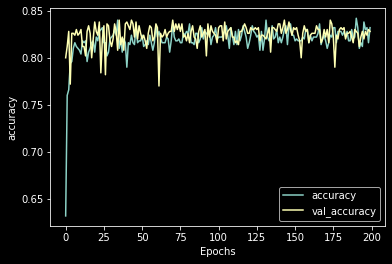

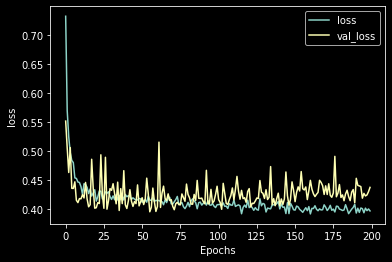

In [22]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 4) Mini Batch Size on Model Behavior (batch_size=32, lr=0.01)

In [23]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))#, kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [24]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD"), 
    metrics=['accuracy'])

In [25]:
# fit model
history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 18ms/step - loss: 0.9890 - accuracy: 0.4640 - val_loss: 0.7414 - val_accuracy: 0.6920
Epoch 2/200
16/16 [==============================] - 0s 8ms/step - loss: 0.7288 - accuracy: 0.6780 - val_loss: 0.6422 - val_accuracy: 0.7500
Epoch 3/200
16/16 [==============================] - 0s 8ms/step - loss: 0.6351 - accuracy: 0.7280 - val_loss: 0.6134 - val_accuracy: 0.8120
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6034 - accuracy: 0.7500 - val_loss: 0.5435 - val_accuracy: 0.7760
Epoch 5/200
16/16 [==============================] - 0s 8ms/step - loss: 0.5651 - accuracy: 0.7740 - val_loss: 0.5290 - val_accuracy: 0.7660
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.5412 - accuracy: 0.7640 - val_loss: 0.4967 - val_accuracy: 0.8080
Epoch 7/200
16/16 [==============================] - 0s 8ms/step - loss: 0.5321 - accuracy: 0.7900 - val_loss: 0.4927 - val_accuracy: 0.8320
Epoch 8/200


In [26]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, valid_acc = model.evaluate(validX, validy, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.816, Valid: 0.828


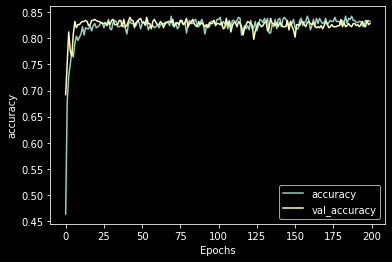

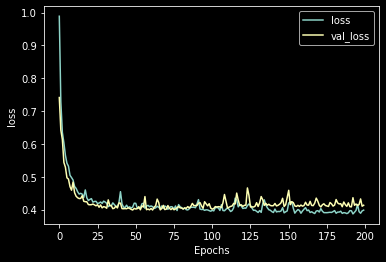

In [27]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 5) Effect of Batch Size on Model Behavior

In [28]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

    # one hot encode output variable
    y = tf.keras.utils.to_categorical(y)
    
    # split into train and valid
    n_train = 500
    trainX, validX = X[:n_train, :], X[n_train:, :]
    trainy, validy = y[:n_train], y[n_train:]
    return trainX, trainy, validX, validy

In [29]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, validX, validy, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD"), 
    metrics=['accuracy'])
    
    # fit model
    history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=200, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

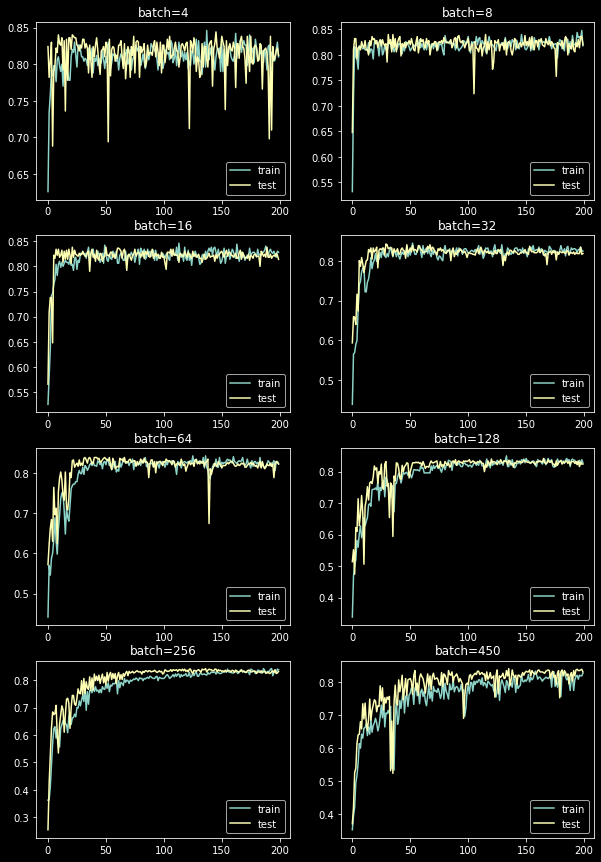

In [30]:
# prepare dataset
trainX, trainy, validX, validy = prepare_data()

# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(trainX, trainy, validX, validy, batch_sizes[i])

# show learning curves
plt.show()